## 2. Data Preprocessing

The second step is all about the data preprocessing and statistics. Here missing values get handled and values get encoded for the next steps.

### Imports

In [14]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Load the Dataset

In [15]:
df = pd.read_csv('../data/student_performance_factors.csv')

### Preprocess - Missing Values

In [16]:
# Check for missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

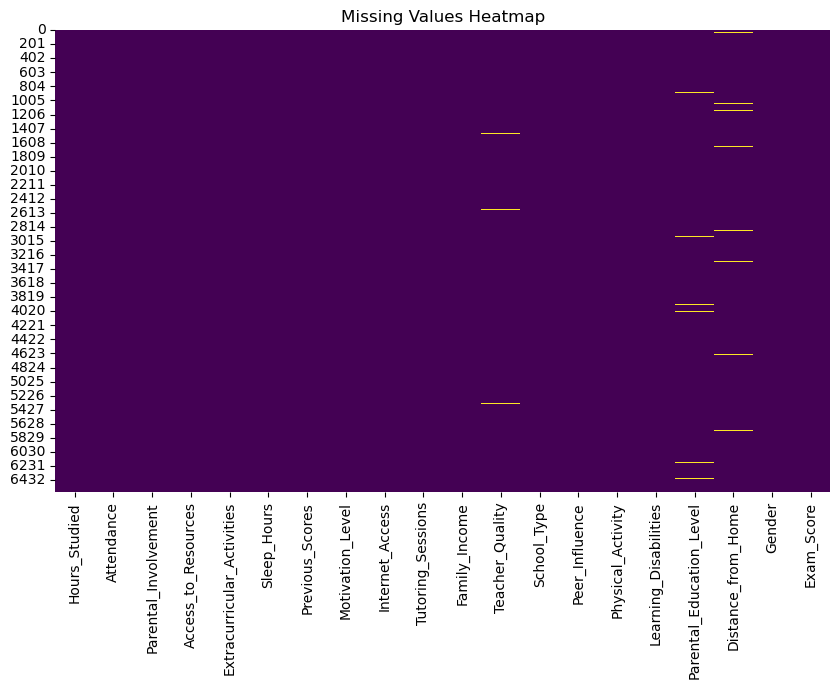

In [17]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [33]:
# Drop rows with missing values
df_cleaned = df.dropna()

In [37]:
# Shape of the cleaned dataset -> verify df_cleaned
f"Dataset contains {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns."

'Dataset contains 6378 rows and 20 columns.'

In [38]:
# Check for missing values -> verify df_cleaned
df_cleaned.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

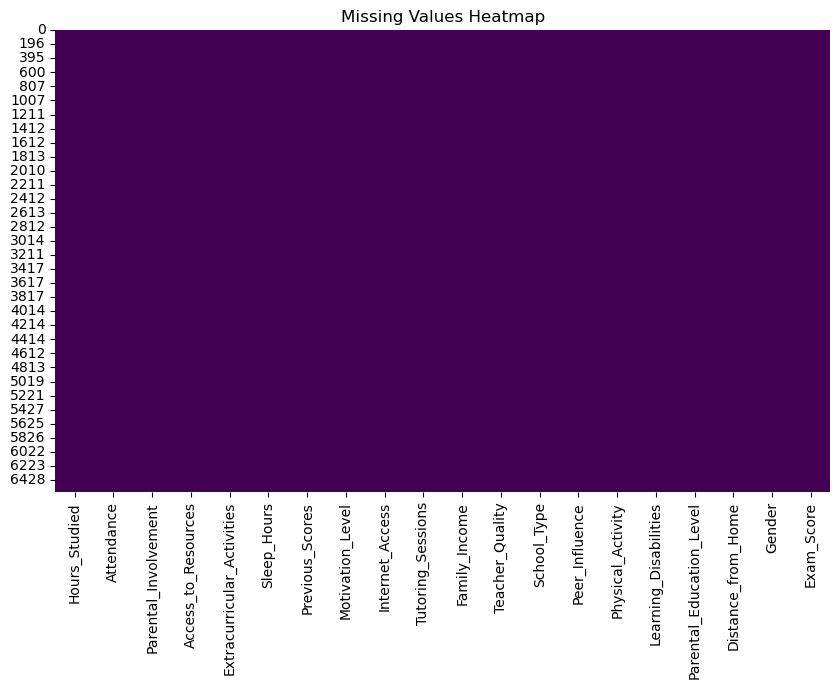

In [65]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [39]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('../data/cleaned_student_performance_factors.csv', index=False)

### Preprocess - Statictics

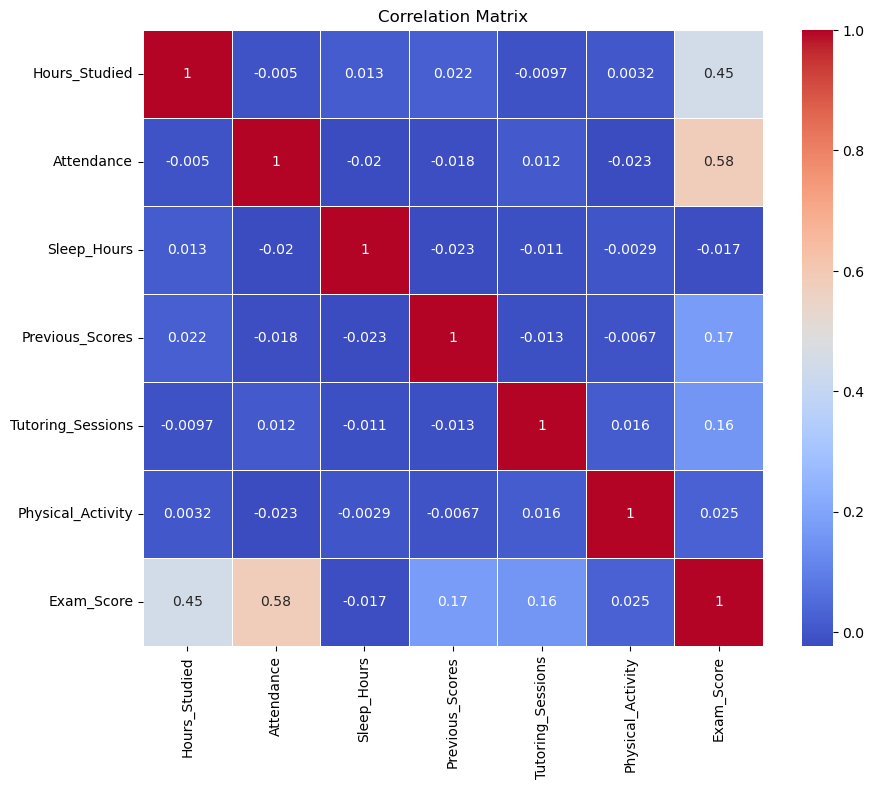

In [43]:
# Compute correlation matrix
numeric_data = df_cleaned.select_dtypes(include=["number"])
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

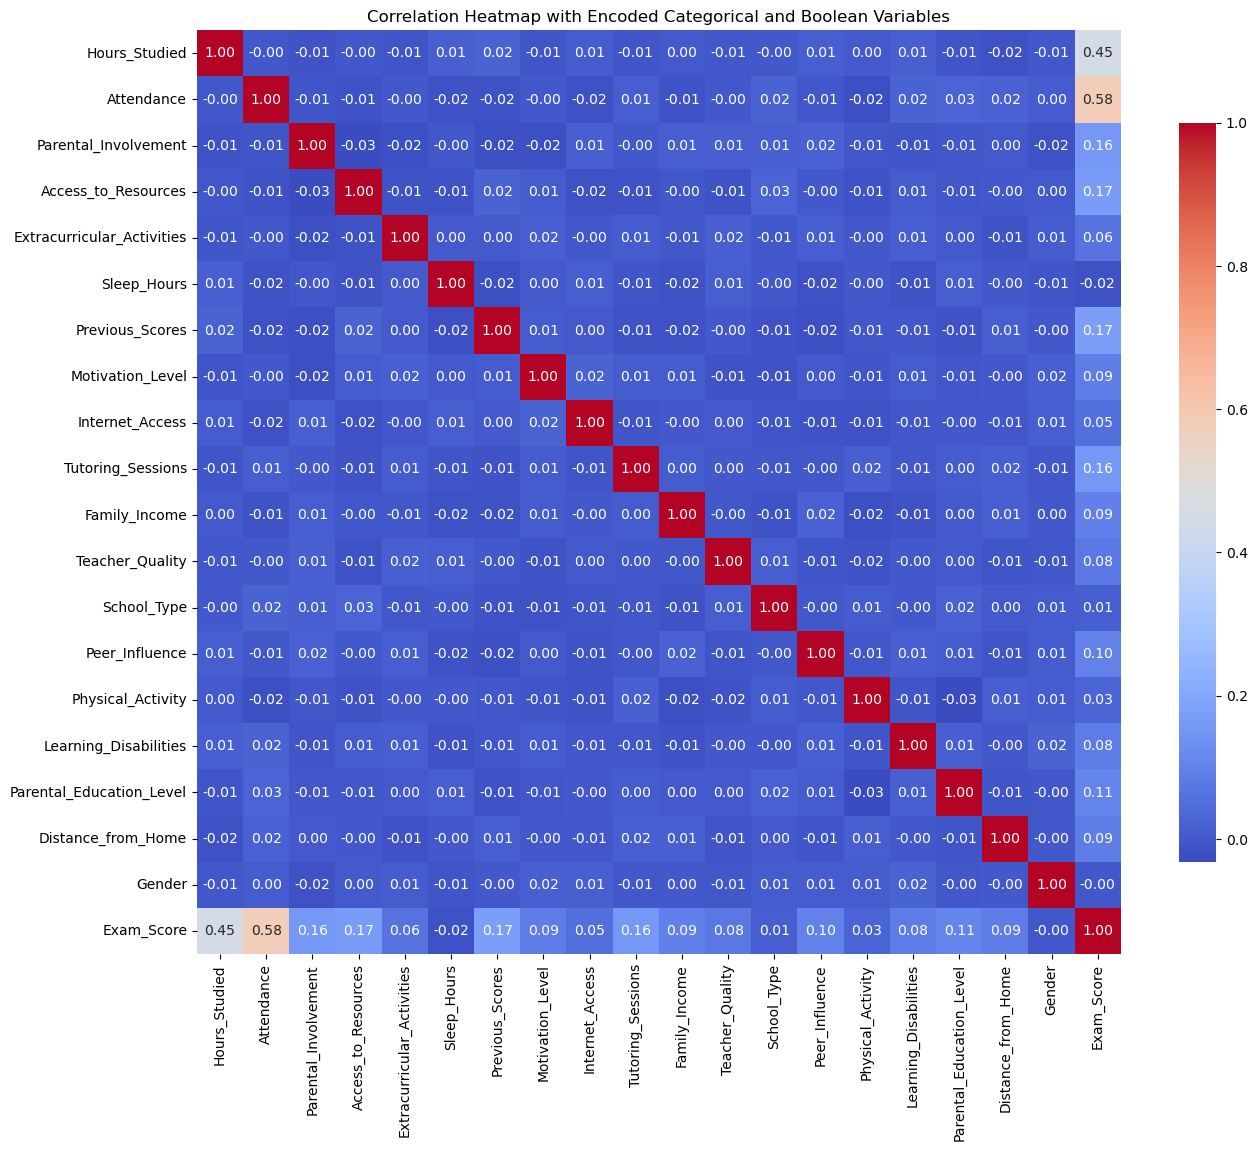

In [63]:
# Encode categorical columns
def encode_categorical_columns(student_performance_factors):
    custom_encodings = {
        'Parental_Involvement': ['Low', 'Medium', 'High'],
        'Access_to_Resources': ['Low', 'Medium', 'High'],
        'Extracurricular_Activities': ['No', 'Yes'],
        'Motivation_Level': ['Low', 'Medium', 'High'],
        'Internet_Access': ['No', 'Yes'],
        'Family_Income': ['Low', 'Medium', 'High'],
        'Teacher_Quality': ['Low', 'Medium', 'High'],
        'School_Type': ['Public', 'Private'],
        'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
        'Learning_Disabilities': ['Yes', 'No'],
        'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
        'Distance_from_Home': ['Far', 'Moderate', 'Near'],
        'Gender': ['Female', 'Male'],
    }
    encoded_data = student_performance_factors.copy()
    for column, mapping in custom_encodings.items():
        if column in encoded_data.columns:
            encoded_data[column] = encoded_data[column].map({val: idx for idx, val in enumerate(mapping)})
    return encoded_data

encoded_data = encode_categorical_columns(df_cleaned)

# Set up the matplotlib figure with desired size
fig, ax = plt.subplots(figsize=(15, 12))  # Adjust the size as needed

# Create the heatmap
sns.heatmap(
    encoded_data.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": .8},
    ax=ax  # Pass the axes to seaborn
)

# Set the title
ax.set_title('Correlation Heatmap with Encoded Categorical and Boolean Variables')

# Display the plot
plt.show()

In [64]:
# Save the encoded DataFrame to a CSV file
encoded_data.to_csv('../data/encoded_student_performance_factors.csv', index=False)